### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../")

In [4]:
import traffic_crashes

In [5]:
pd.options.display.max_columns = None

### Data

In [20]:
# filepath = "../data/traffic-crashes/Traffic_Crashes_-_Crashes.csv"
# df = pd.read_csv(filepath)

df = traffic_crashes.load_data()
people = traffic_crashes.load_people_dataset()

/Users/joegambino/Documents/IDEO/whitespace/treepedia/notebooks/../traffic_crashes/load_and_clean_data.py:23: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [11]:
df.shape

(755244, 48)

In [46]:
ts_min, ts_max = df["CRASH_DATE"].min(), df["CRASH_DATE"].max()
ts_min, ts_max

(Timestamp('2013-03-03 04:48:00'), Timestamp('2023-08-27 12:50:00'))

### Where are these crashes?
Many records are missing a Latitude and Longitude, but they do have an address. So I will need to geocode. Many of those missing values are on Damen, which could be near me!

In [13]:
missing_location = df[df["LATITUDE"] == 0]
missing_location.shape[0]

44

Text(0.5, 1.0, 'There are 755244 records in this dataset\nand they happen everywhere.')

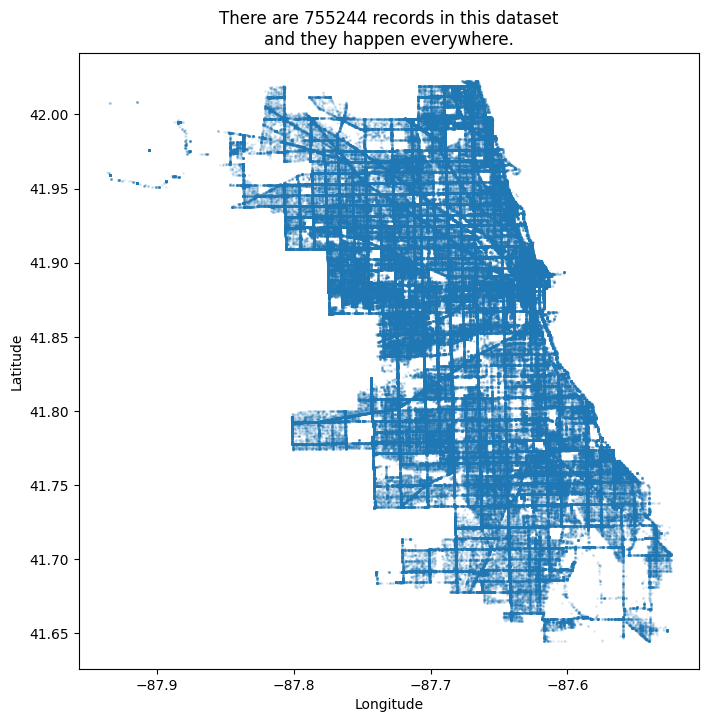

In [14]:
valid_location = df[df["LATITUDE"] != 0]

x = valid_location["LONGITUDE"].values
y = valid_location["LATITUDE"].values

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y, s=1, alpha=0.1)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(f"There are {df.shape[0]} records in this dataset\nand they happen everywhere.")

### Crashes Involving People

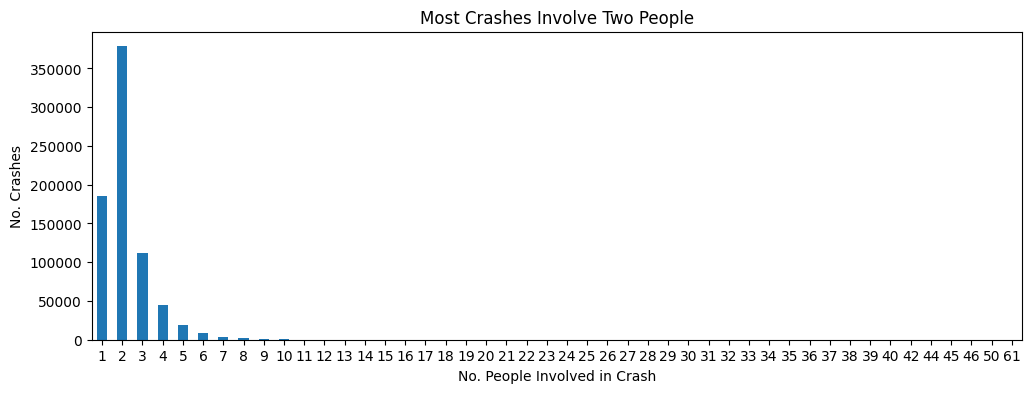

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
people_involved_in_crash = people["CRASH_RECORD_ID"].value_counts().value_counts().sort_index()
people_involved_in_crash.plot.bar(ax=ax)

ax.set_xlabel("No. People Involved in Crash")
ax.set_ylabel("No. Crashes")
ax.set_title("Most Crashes Involve Two People")
plt.xticks(rotation=0);

In [17]:
people["PERSON_TYPE"].value_counts()

PERSON_TYPE
DRIVER                 1289520
PASSENGER               335637
PEDESTRIAN               19034
BICYCLE                  11599
NON-MOTOR VEHICLE         1357
NON-CONTACT VEHICLE        290
Name: count, dtype: int64

In [33]:
pedestrians = people[people["PERSON_TYPE"].isin(["PEDESTRIAN", "BICYCLE"])]

In [39]:
crashes_involving_people = df[df.index.isin(pedestrians["CRASH_RECORD_ID"])]

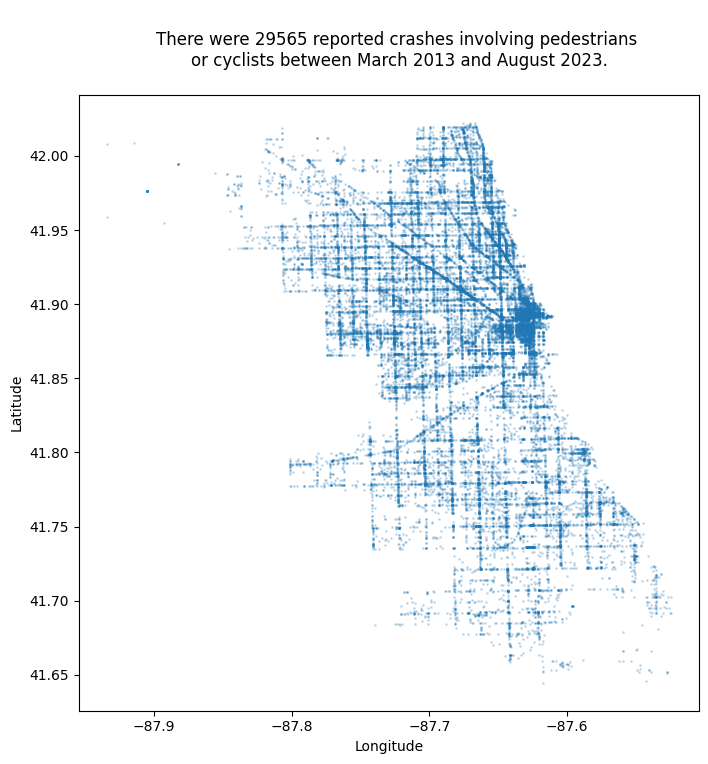

In [55]:
crashes_involving_people = crashes_involving_people[crashes_involving_people["LATITUDE"] != 0]

x = crashes_involving_people["LONGITUDE"].values
y = crashes_involving_people["LATITUDE"].values

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y, s=1, alpha=0.2)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ttl = f"""
    There were {crashes_involving_people.shape[0]} reported crashes involving pedestrians 
    or cyclists between {ts_min.strftime("%B %Y")} and {ts_max.strftime("%B %Y")}.
"""
ax.set_title(ttl);
plt.savefig("plots/pedestrians-hit-by-cars.png", dpi=300)

In [52]:
ts_min

'March 2013'

In [ ]:
sum(df["CRASH_RECORD_ID"].value_counts() != 1)

In [ ]:
!pyenv versions